# Milestone 1 - EDA and Preprocessing data 

- Load the Dataset

> Make sure to include markdown-based text commenting and explaining each step you perform.

# 1 - Extraction

Required Libraries for EDA

In [1]:
# importing libraries

# Data manipulation and preprocessing
import pandas as pd
import numpy as np

# Data visualization
import matplotlib.pyplot as plt
from matplotlib import rcParams
import seaborn as sns

# Cool plotting style
plt.style.use('ggplot')
rcParams['figure.figsize'] = 12, 6

Set an option to display all columns

In [2]:
pd.set_option('display.max_columns', None)

Function to load the dataset

In [3]:
def load_data(data_path):
    # Load the data
    data = pd.read_csv(data_path)
    return data

In [4]:
data_path = 'data/fintech_data_22_52_14669.csv'
df = load_data(data_path)

# 2- EDA

Showing the first 5 rows of the dataset

In [5]:
df.head()

,Customer Id,Emp Title,Emp Length,Home Ownership,Annual Inc,Annual Inc Joint,Verification Status,Zip Code,Addr State,Avg Cur Bal,Tot Cur Bal,Loan Id,Loan Status,Loan Amount,State,Funded Amount,Term,Int Rate,Grade,Issue Date,Pymnt Plan,Type,Purpose,Description
0,YidceGZkXHgxZmtceGY1XHhiOFx4MDN3XHg4MnxceGUxXH...,Lieutenant,10+ years,MORTGAGE,200000.0,NaN,Source Verified,117xx,NY,19404.0,329872.0,197838,Current,20000.0,NY,20000.0,60 months,0.1240,6,19 August 2019,False,Individual,debt_consolidation,Debt consolidation
1,YidUXHhhZlx4YTVcdFx4ZmYhRWpbXHhmMDRceDE4WE03XH...,Senior Film Management,10+ years,MORTGAGE,63000.0,NaN,Verified,441xx,OH,1946.0,38927.0,124597,Current,12000.0,OH,12000.0,60 months,0.0993,7,17 November 2017,False,Individual,credit_card,Credit card refinancing
2,YidceGY5KUBceGVkXHhiOW9ceGI2ZVx4ZmVceGYze1x4YW...,Machinist 2,1 year,OWN,30000.0,NaN,Verified,972xx,OR,22762.0,136571.0,107933,Charged Off,10750.0,OR,10750.0,36 months,0.1952,23,15 March 2015,False,Individual,debt_consolidation,Debt consolidation
3,Yid3XHgwMVxyQVx4MTQxXHg5OFx4YjVceGMxPVx4OGZceD...,customer service,10+ years,RENT,20000.0,NaN,Verified,486xx,MI,1610.0,9662.0,63136,Charged Off,8000.0,MI,8000.0,36 months,0.0789,2,15 March 2015,False,Individual,credit_card,Credit card refinancing
4,YidceGFhXHgxMn5cblx4OGJceDkwXHhjN1x4YjRMR1x4Yz...,Drivet,2 years,RENT,48000.0,NaN,Source Verified,334xx,FL,5341.0,48069.0,20511,Current,4200.0,FL,4200.0,36 months,0.0993,8,17 December 2017,False,Individual,debt_consolidation,Debt consolidation


Showing the last 5 rows of the dataset

In [6]:
df.tail()

,Customer Id,Emp Title,Emp Length,Home Ownership,Annual Inc,Annual Inc Joint,Verification Status,Zip Code,Addr State,Avg Cur Bal,Tot Cur Bal,Loan Id,Loan Status,Loan Amount,State,Funded Amount,Term,Int Rate,Grade,Issue Date,Pymnt Plan,Type,Purpose,Description
27025,YidceGYxXHhkMTAkXHhlNnNceDE0ZVx4ZTBceGI3XHJceG...,HHA,10+ years,RENT,45000.0,170000.0,Not Verified,100xx,NY,3057.0,36682.0,200561,Current,20000.0,NY,20000.0,60 months,0.1709,16,18 February 2018,False,Joint App,debt_consolidation,Debt consolidation
27026,YidceDgwW1x4MDJceGM4TipceGRkXHgwZWBiNlx4OTZceD...,Letter Carrier,10+ years,MORTGAGE,91500.0,NaN,Source Verified,331xx,FL,18327.0,256580.0,13029,Current,3200.0,FL,3200.0,36 months,0.1349,12,16 October 2016,False,INDIVIDUAL,home_improvement,Home improvement
27027,YidceGJlXHhmYlx4YTJccldceDAzSFx4OTJceGEwXHhmNF...,Chief building engineer,1 year,OWN,95000.0,NaN,Source Verified,088xx,NJ,3070.0,30702.0,147842,Current,15000.0,NJ,15000.0,36 months,0.0799,1,17 January 2017,False,Individual,debt_consolidation,Debt consolidation
27028,YiI/XHg5Nz5ceDk0MFx4ZWFqd1ZceGM4RlZceDgyXHg4Zm...,Field Inspector,< 1 year,OWN,27500.0,NaN,Not Verified,201xx,VA,2013.0,10064.0,84652,Current,10000.0,VA,10000.0,36 months,0.0702,5,19 February 2019,False,Individual,debt_consolidation,Debt consolidation
27029,YiJceDliIEJHXHhhY1x4ZTFrXHhiOVx4MTRceDg0XHhkMG...,Senior Center Specialist,7 years,MORTGAGE,31000.0,150000.0,Not Verified,300xx,GA,30713.0,245706.0,63573,Current,8000.0,GA,8000.0,36 months,0.0819,1,19 July 2019,False,Joint App,credit_card,Credit card refinancing


Getting the size of the dataset (rows, columns)

In [7]:
df.shape

(27030, 24)

Getting short summary of the dataset

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27030 entries, 0 to 27029
Data columns (total 24 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Customer Id          27030 non-null  object 
 1   Emp Title            24654 non-null  object 
 2   Emp Length           25173 non-null  object 
 3   Home Ownership       27030 non-null  object 
 4   Annual Inc           27030 non-null  float64
 5   Annual Inc Joint     1920 non-null   float64
 6   Verification Status  27030 non-null  object 
 7   Zip Code             27030 non-null  object 
 8   Addr State           27030 non-null  object 
 9   Avg Cur Bal          27030 non-null  float64
 10  Tot Cur Bal          27030 non-null  float64
 11  Loan Id              27030 non-null  int64  
 12  Loan Status          27030 non-null  object 
 13  Loan Amount          27030 non-null  float64
 14  State                27030 non-null  object 
 15  Funded Amount        27030 non-null 

Getting statistical summary of the dataset

In [9]:
df.describe()

,Annual Inc,Annual Inc Joint,Avg Cur Bal,Tot Cur Bal,Loan Id,Loan Amount,Funded Amount,Int Rate,Grade
count,2.703000e+04,1.920000e+03,27030.000000,2.703000e+04,27030.000000,27030.000000,27030.000000,25819.000000,27030.000000
mean,8.038403e+04,1.306625e+05,13642.988272,1.447128e+05,134907.454569,15375.772290,15375.772290,0.130201,10.848946
std,1.059586e+05,8.254032e+04,16946.032082,1.663899e+05,77931.494675,9437.017325,9437.017325,0.048821,6.304635
min,2.000000e+03,2.300000e+04,0.000000,0.000000e+00,11.000000,1000.000000,1000.000000,0.053100,1.000000
25%,4.784000e+04,8.500000e+04,3075.000000,2.938375e+04,66868.750000,8000.000000,8000.000000,0.091700,6.000000
50%,6.631050e+04,1.150000e+05,7399.000000,8.040300e+04,134591.500000,13000.000000,13000.000000,0.124900,10.000000
75%,9.500000e+04,1.546250e+05,18838.500000,2.157390e+05,202027.000000,20000.000000,20000.000000,0.159900,15.000000
max,7.691779e+06,1.750000e+06,555925.000000,4.447397e+06,270296.000000,40000.000000,40000.000000,0.309900,35.000000


Showing correlation between the columns

In [10]:
df.isnull().sum()

Customer Id                0
Emp Title               2376
Emp Length              1857
Home Ownership             0
Annual Inc                 0
Annual Inc Joint       25110
Verification Status        0
Zip Code                   0
Addr State                 0
Avg Cur Bal                0
Tot Cur Bal                0
Loan Id                    0
Loan Status                0
Loan Amount                0
State                      0
Funded Amount              0
Term                       0
Int Rate                1211
Grade                      0
Issue Date                 0
Pymnt Plan                 0
Type                       0
Purpose                    0
Description              218
dtype: int64

In [11]:
df.corr()

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_23856\1134722465.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,Annual Inc,Annual Inc Joint,Avg Cur Bal,Tot Cur Bal,Loan Id,Loan Amount,Funded Amount,Int Rate,Grade,Pymnt Plan
Annual Inc,1.000000,0.807666,0.200797,0.280257,0.193089,0.213653,0.213653,-0.051575,-0.053609,-0.003675
Annual Inc Joint,0.807666,1.000000,0.319660,0.532043,0.269267,0.292910,0.292910,-0.126253,-0.122337,-0.007107
Avg Cur Bal,0.200797,0.319660,1.000000,0.838531,0.215304,0.233255,0.233255,-0.071312,-0.070092,-0.001721
Tot Cur Bal,0.280257,0.532043,0.838531,1.000000,0.286228,0.307663,0.307663,-0.073880,-0.072861,0.000318
Loan Id,0.193089,0.269267,0.215304,0.286228,1.000000,0.962091,0.962091,0.092914,0.087354,-0.001695
Loan Amount,0.213653,0.292910,0.233255,0.307663,0.962091,1.000000,1.000000,0.061984,0.057044,-0.002848
Funded Amount,0.213653,0.292910,0.233255,0.307663,0.962091,1.000000,1.000000,0.061984,0.057044,-0.002848
Int Rate,-0.051575,-0.126253,-0.071312,-0.073880,0.092914,0.061984,0.061984,1.000000,0.922195,-0.000177
Grade,-0.053609,-0.122337,-0.070092,-0.072861,0.087354,0.057044,0.057044,0.922195,1.000000,-0.000969
Pymnt Plan,-0.003675,-0.007107,-0.001721,0.000318,-0.001695,-0.002848,-0.002848,-0.000177,-0.000969,1.000000


#### Functions to plot the data for visualization

In [12]:
def plot_correlation_matrix(df: pd.DataFrame, figsize: tuple):
    plt.figure(figsize=figsize)
    sns.heatmap(df.corr(), 
                cbar=True, 
                annot=True, 
                square=True, 
                cmap='Spectral_r', 
                fmt='.2f', 
                linewidths=2,
                annot_kws={'size': 15})
    plt.show()

def plot_histogram(df: pd.DataFrame, column_name: str, kde, figsize: tuple):
    plt.figure(figsize=figsize)
    sns.histplot(df[column_name], kde=kde)
    plt.title(f'Distribution of {column_name}')
    plt.show()

def plot_boxplot_single_column(df: pd.DataFrame, column_name: str, figsize: tuple):
    plt.figure(figsize=figsize)
    sns.boxplot(x=column_name, data=df)
    plt.title(f'Boxplot of {column_name}')
    plt.show()

def plot_boxplot_multiple_columns(df: pd.DataFrame, 
                                  column_name1:str, 
                                  column_name2: str, 
                                  title: str, 
                                  x_label: str, 
                                  y_label: str, 
                                  figsize: tuple):
    plt.figure(figsize=figsize)
    sns.boxplot(x=column_name1, y=column_name2, data=df)
    plt.title(title)
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.show()

def plot_vertical_countplot(df: pd.DataFrame, column_name: str, figsize: tuple):
    plt.figure(figsize=figsize)
    sns.countplot(x=column_name, data=df)
    plt.title(f'Countplot of {column_name}')
    plt.show()

def plot_horizontal_countplot(df: pd.DataFrame, column_name: str, figsize: tuple):
    plt.figure(figsize=figsize)
    # sorted
    sns.countplot(y=column_name, data=df, order = df[column_name].value_counts().index)
    plt.title(f'Countplot of {column_name}')
    plt.show()

def plot_countplot_multiple_columns(df: pd.DataFrame, 
                                  column_name1:str, 
                                  column_name2: str, 
                                  title: str, 
                                  x_label: str, 
                                  y_label: str, 
                                  figsize: tuple):
    plt.figure(figsize=figsize)
    sns.countplot(data=df, x=column_name1, hue=column_name2, palette='Set2')
    plt.title(title)
    plt.xlabel(column_name1)
    plt.ylabel('Count')
    plt.legend(title=column_name2)
    plt.xticks(rotation=45)
    plt.show()


def plot_top_n_barplot(df: pd.DataFrame, n: int, title: str, figsize: tuple):
    plt.figure(figsize=figsize)
    sns.barplot(x=df.values[:n], y=df.index[:n])
    plt.title(f'Top {n} {title}')
    plt.xlabel('Count')
    plt.ylabel('Category')
    plt.show()

def plot_scatterplot(df: pd.DataFrame, x:str, y:str, figsize: tuple):
    plt.figure(figsize=figsize)
    sns.scatterplot(x=x, y=y, data=df)
    plt.title(f'{x} vs {y}')
    plt.show()

def plot_scatter_average(df: pd.DataFrame, columnName1: str, columnName2: str, figsize: tuple):
  average = df.groupby(columnName1)[columnName2].mean()
  plt.figure(figsize=figsize)
  plt.xlabel(columnName1)
  plt.ylabel(columnName2)
  plt.title(columnName2+' VS. '+columnName1)
  plt.scatter(average.index,average)
  plt.show()

Showing Relationship between features

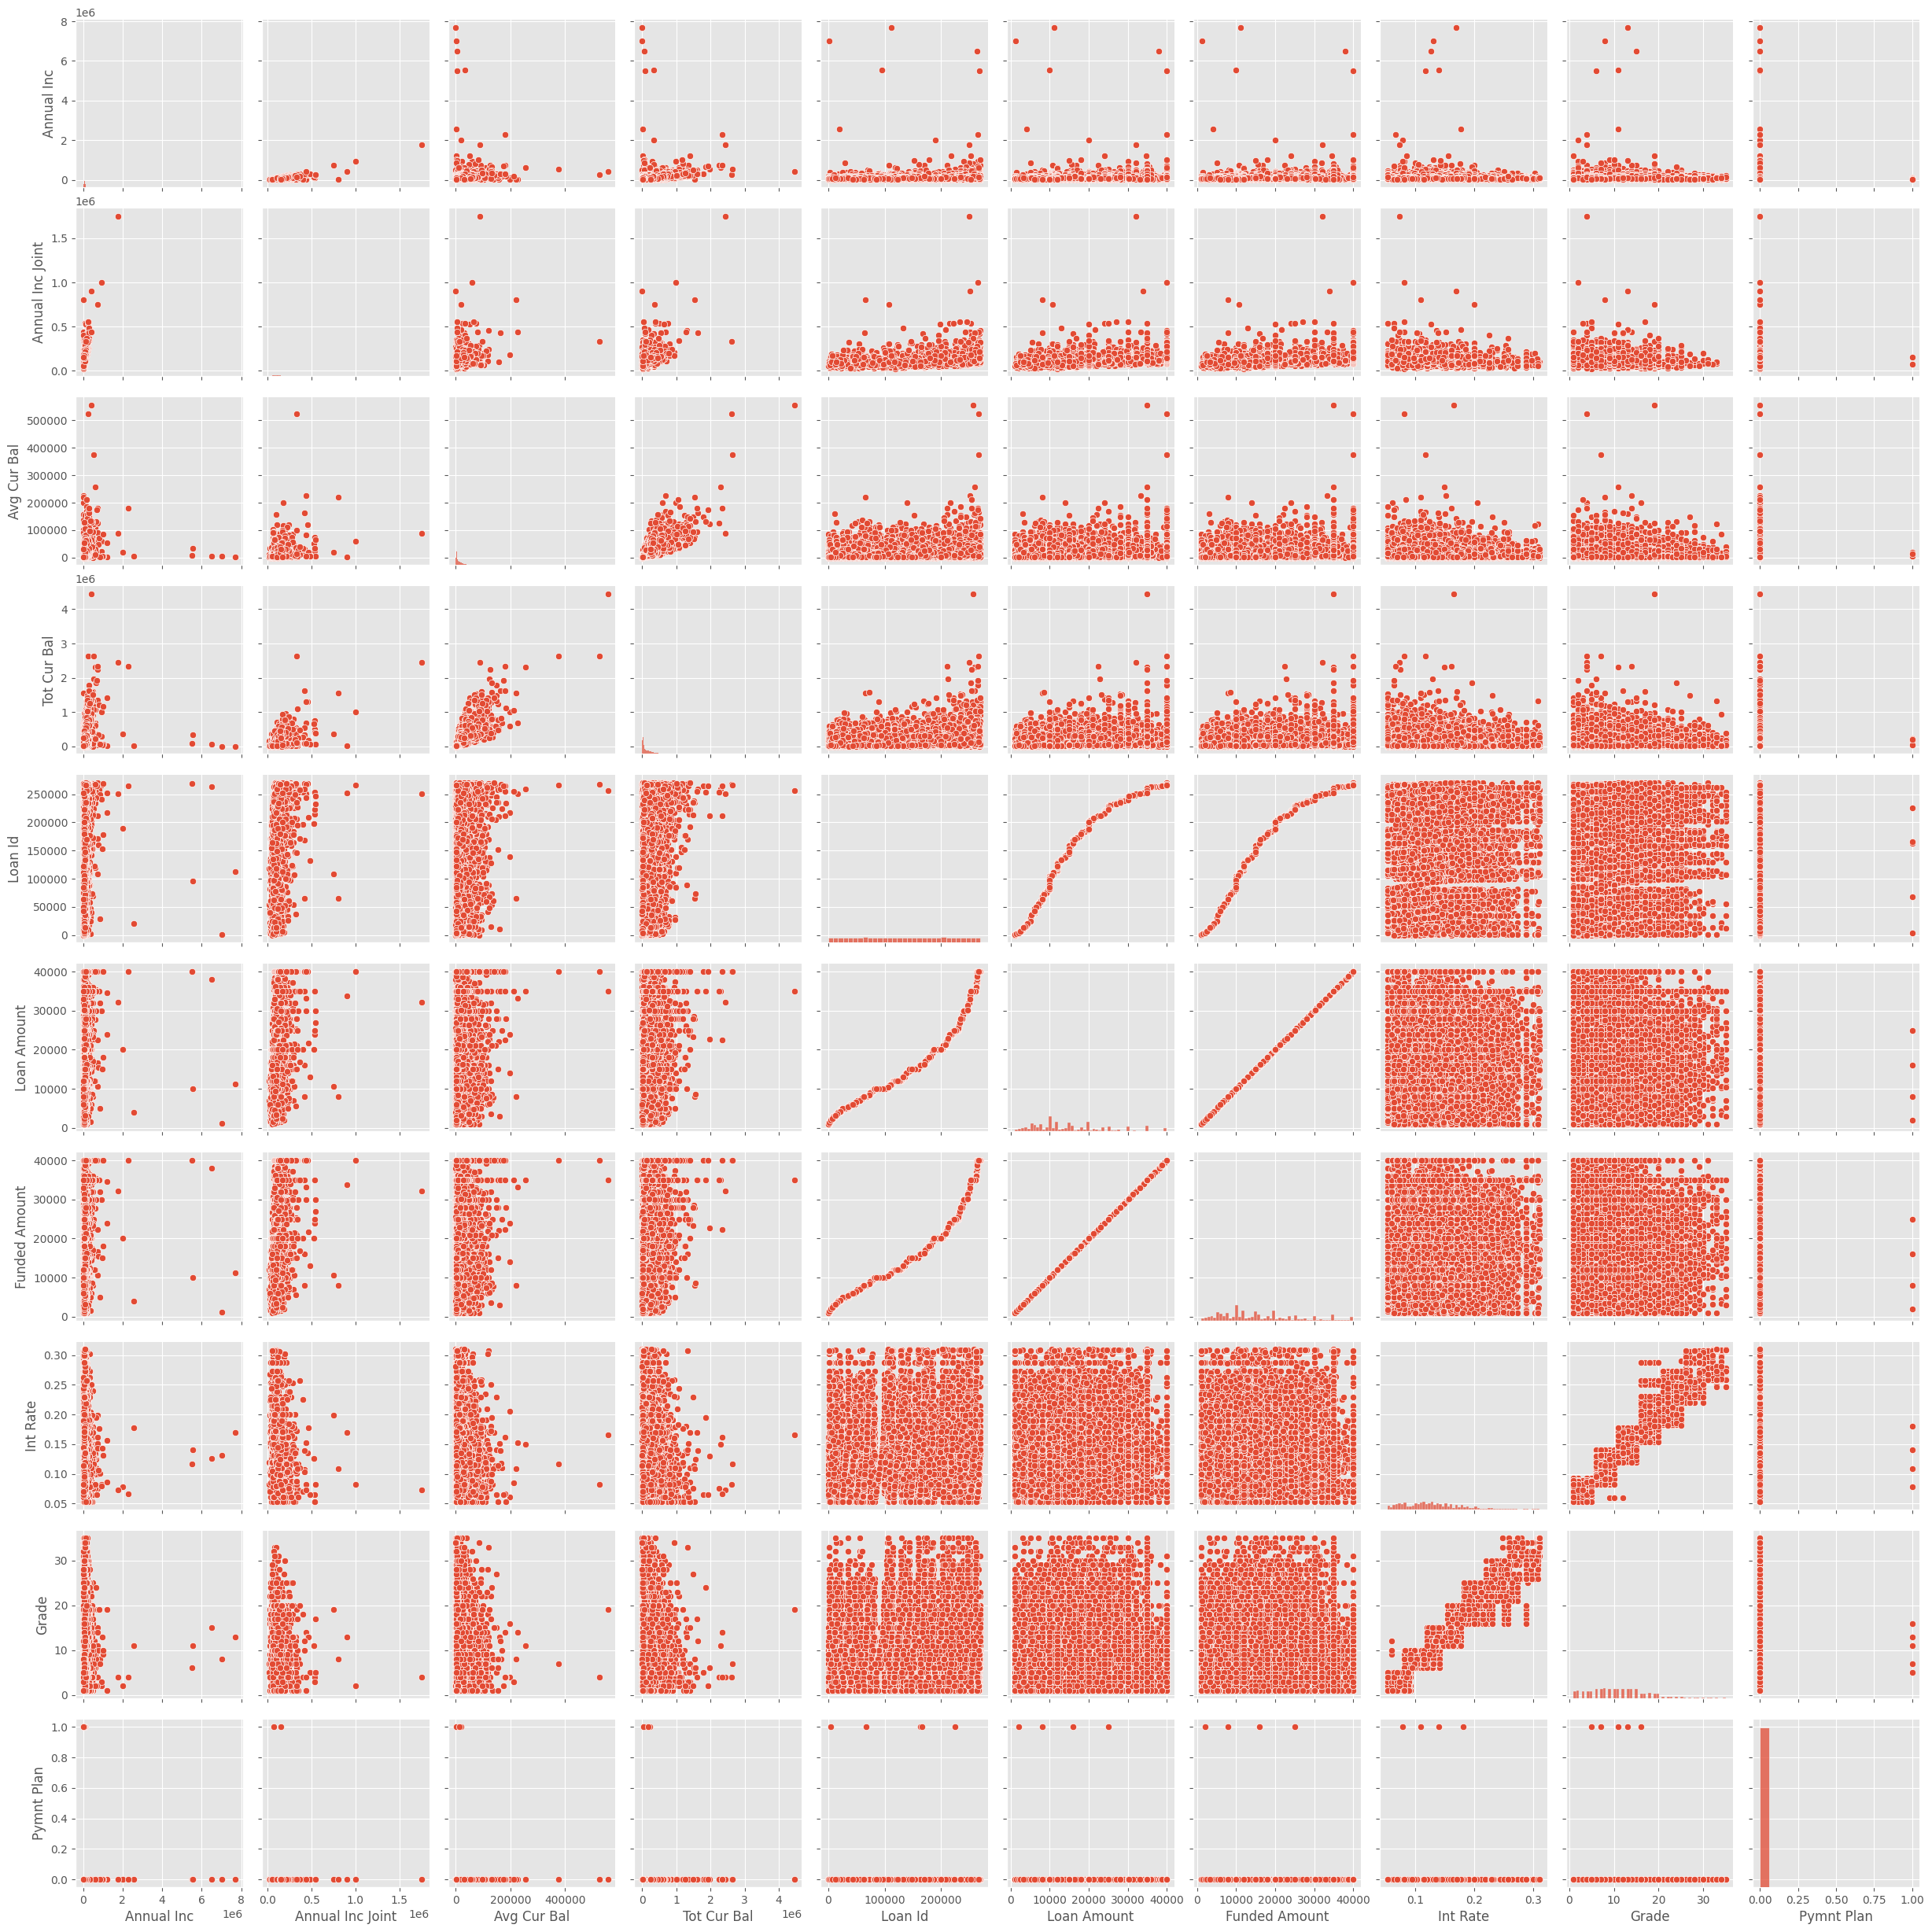

In [13]:
sns.pairplot(df)

Studying correlation between features

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_23856\628346930.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),


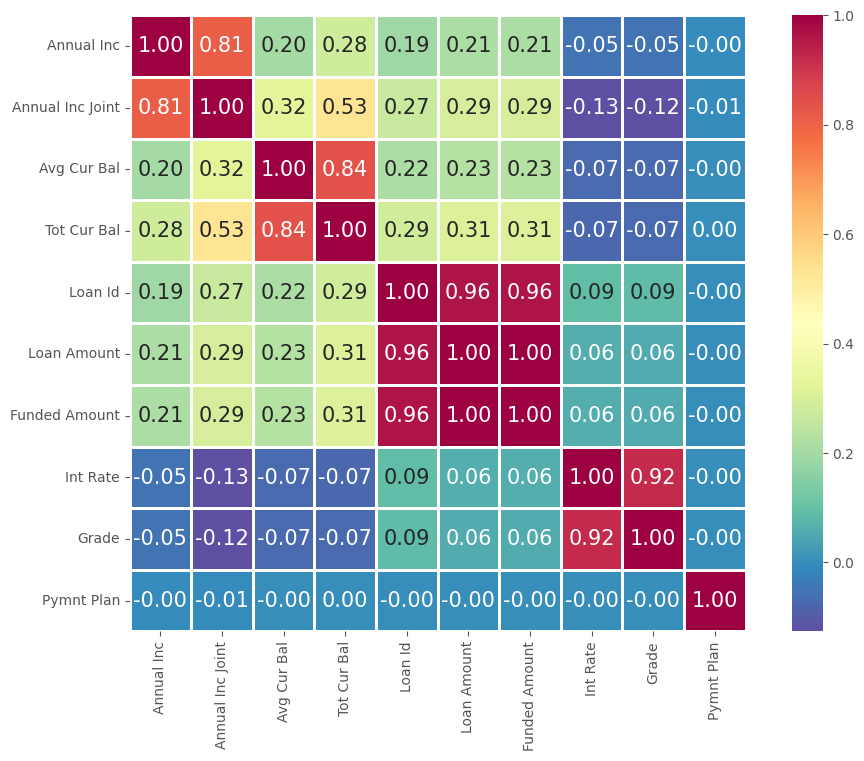

In [14]:
plot_correlation_matrix(df, (12, 8))

- Q1: What is the distribution loan amount among customers?

Answer: The distribution of loan amount among customers is right-skewed, with most customers having a loan amount of around 10000. We can observe that most loans fall within a specific range indicating that customers tend to borrow moderate amounts.

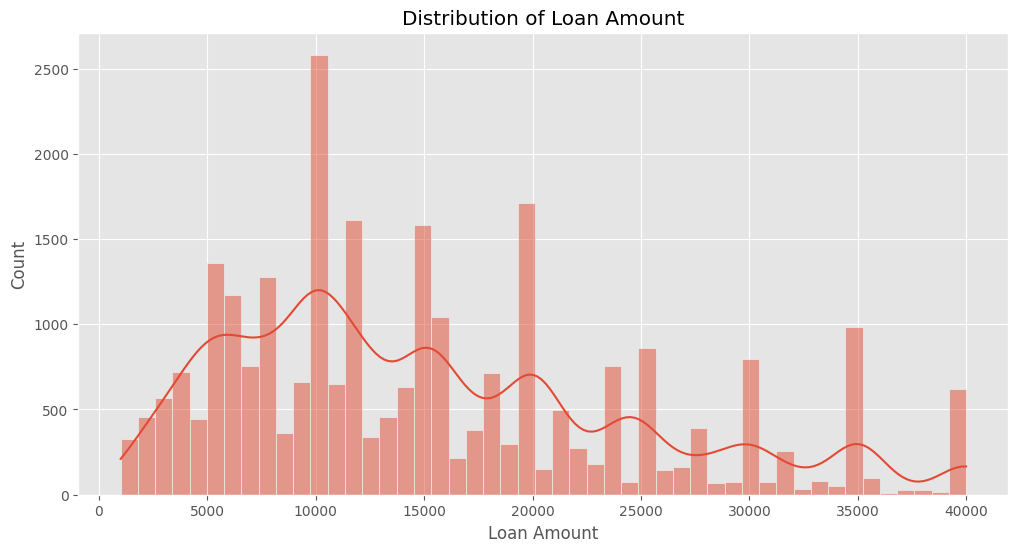

In [15]:
plot_histogram(df, column_name='Loan Amount', kde=True, figsize=(12, 6))

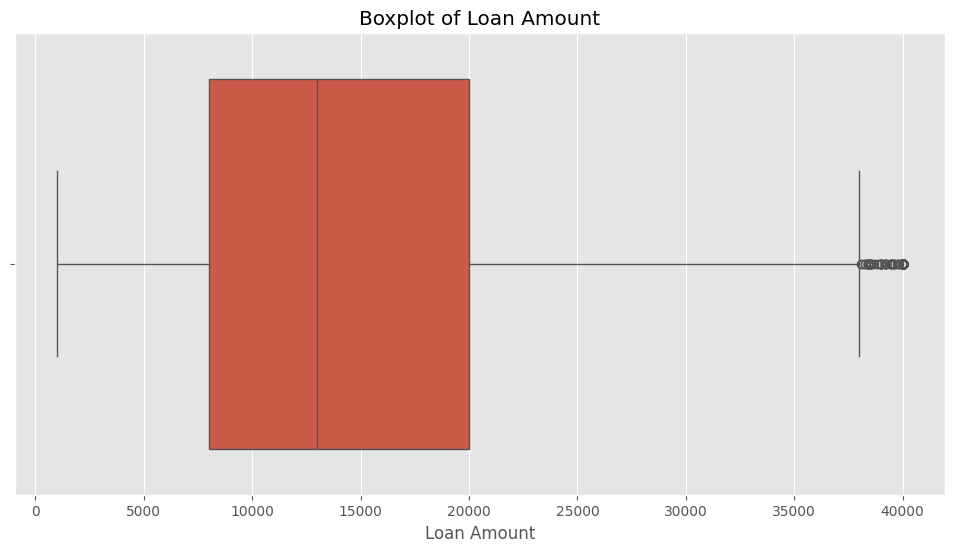

In [16]:
plot_boxplot_single_column(df, column_name='Loan Amount', figsize=(12, 6))

- Q2: What is the top 10 employee title that issue a loan?

Answer: We can observe that the top 10 employee titles that issue loans are Teacher, Manager, Owner, Registered Nurse, Driver, Supervisor, Sales, Project Manager and Office Manager. 

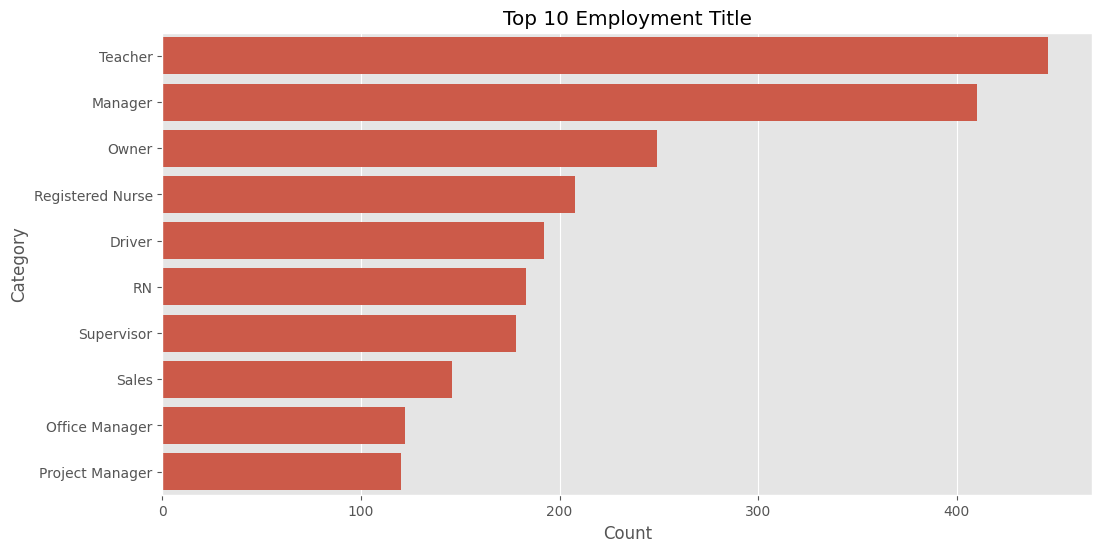

In [17]:
plot_top_n_barplot(df['Emp Title'].value_counts(), 10, 'Employment Title', figsize=(12, 6))

- Q3: What is the distribution of the number of years of employment among customers?

Answer: We can observe that employees with 10 years of employment are the most common among customers. The most customers that issue loan

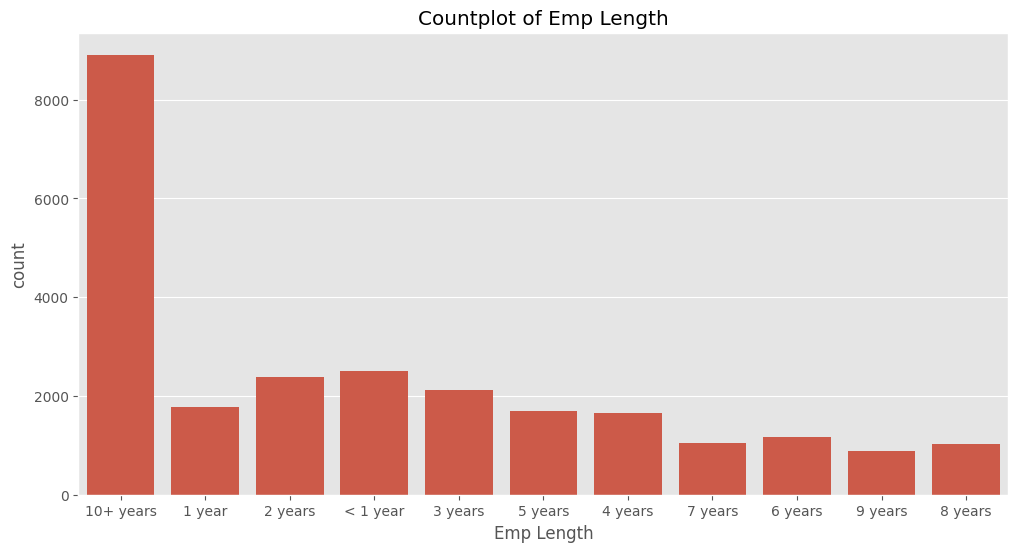

In [18]:
plot_vertical_countplot(df, 'Emp Length', figsize=(12, 6))

- Q4: What is the distribution of the loan amount among customers with different employment lengths?

Answer: Loan amounts do not vary significantly by employment length, but there is a slight increase in loan amounts for customers with longer employment. Customers with very short employment lengths also have smaller loan amounts on average.

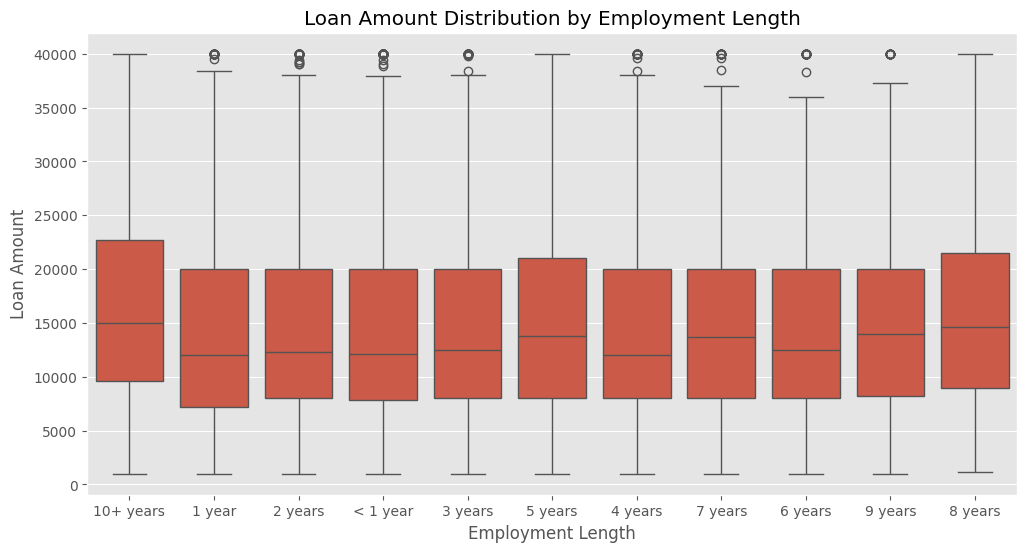

In [19]:
plot_boxplot_multiple_columns(df, 'Emp Length', 'Loan Amount', 'Loan Amount Distribution by Employment Length', 'Employment Length', 'Loan Amount', (12, 6))

- Q5: What is the relationship between the annual income and loan amount?

Answer: We can observe that there seems to be a positive trend, higher-income individuals generally take larger loans, yet the correlation is not strictly linear, suggesting that other factors may also influence loan amount.

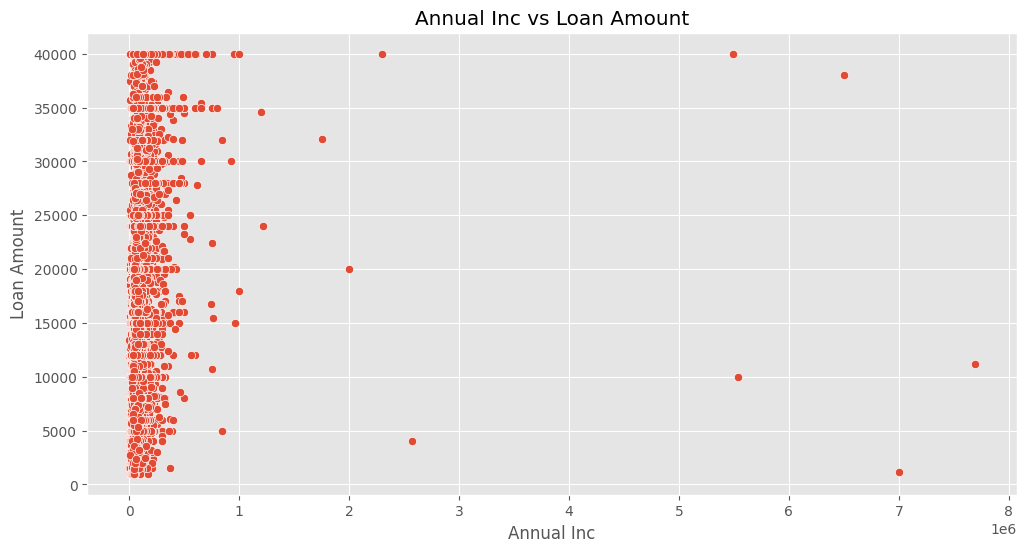

In [20]:
# relationship between annual income and loan amount
plot_scatterplot(df, 'Annual Inc', 'Loan Amount', figsize=(12, 6))

- Q6: Are most of the customer's income and employment verified?

Answer: We can observe that there is a high percentage of customers whose income and employment are not verified. This could be a potential risk that these customers may not be able to repay the loan.

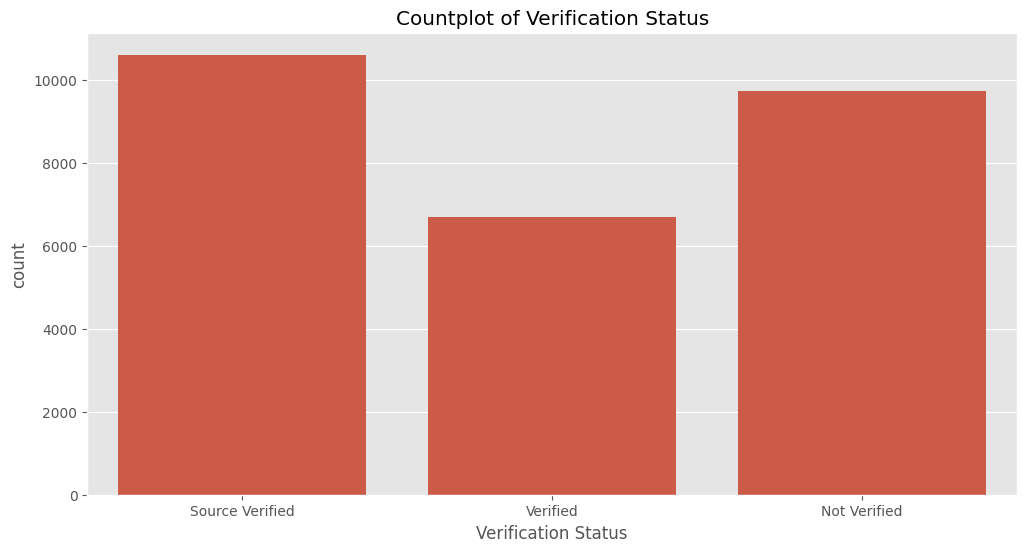

In [21]:
plot_vertical_countplot(df, 'Verification Status', figsize=(12, 6))

- Q7: What is the geographical distribution of customers based on state?

Answer: We can observe that the top 5 states with the highest number of borrowers are California, Texas, New York, Florida, and Illinois.

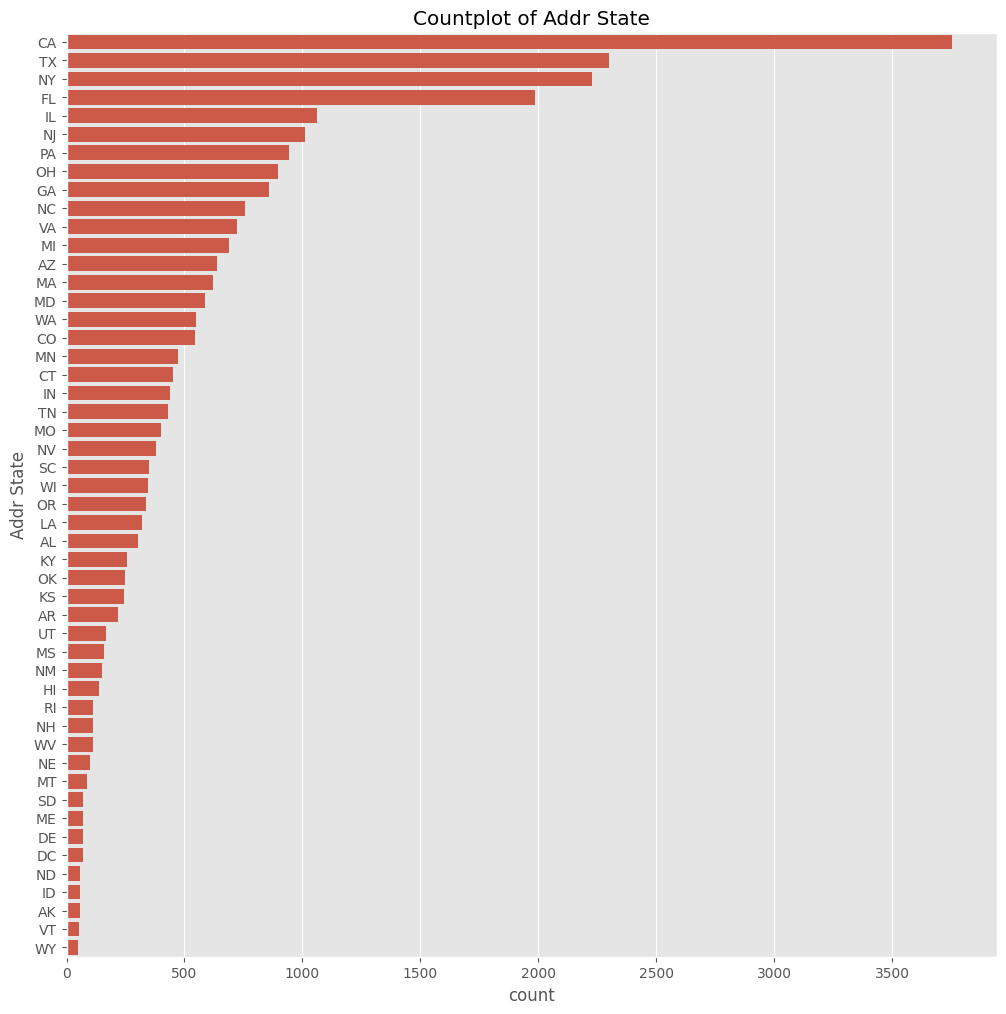

In [22]:
plot_horizontal_countplot(df, 'Addr State', figsize=(12, 12))


- Q8: What is the distribution of the loan status

Answer: We can observe that most loans are current, followed by fully paid. This indicates that most customers are able to repay their loans(i.e most of the loans are either actively being repaid or have been fully repaid)


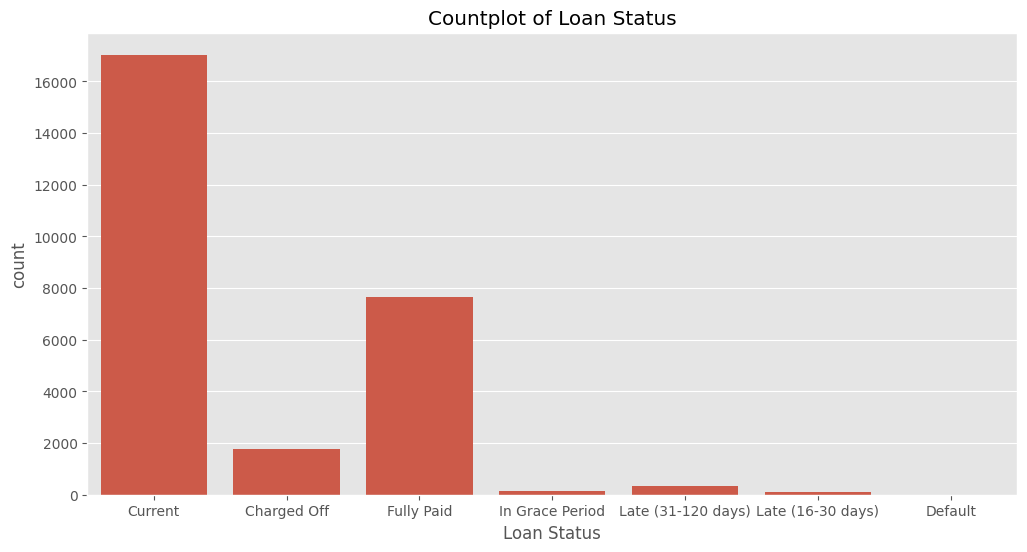

In [23]:
plot_vertical_countplot(df, 'Loan Status', figsize=(12, 6))

- Q9: What is the distribution of the loan status based on the loan grade?

Answer: We can observe that most loans are grade B, followed by grade C. Most of the loans are current, followed by fully paid. This indicates that most customers are able to repay their loans(i.e most of the loans are either actively being repaid or have been fully repaid)

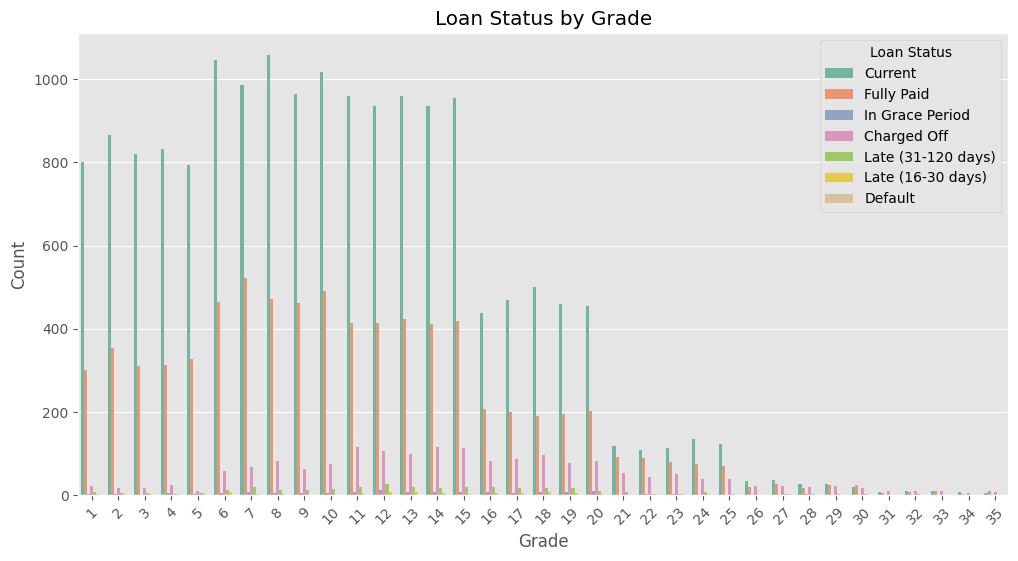

In [24]:
plot_countplot_multiple_columns(df, 'Grade', 'Loan Status', 'Loan Status by Grade', 'Grade', 'Count', (12, 6))


- Q10: Is the loan amount affected by the loan grade?

Answer: We can observe that classes E,F,G have higher loan amounts compared to other classes. This indicates that customers with lower loan grades tend to borrow more money.

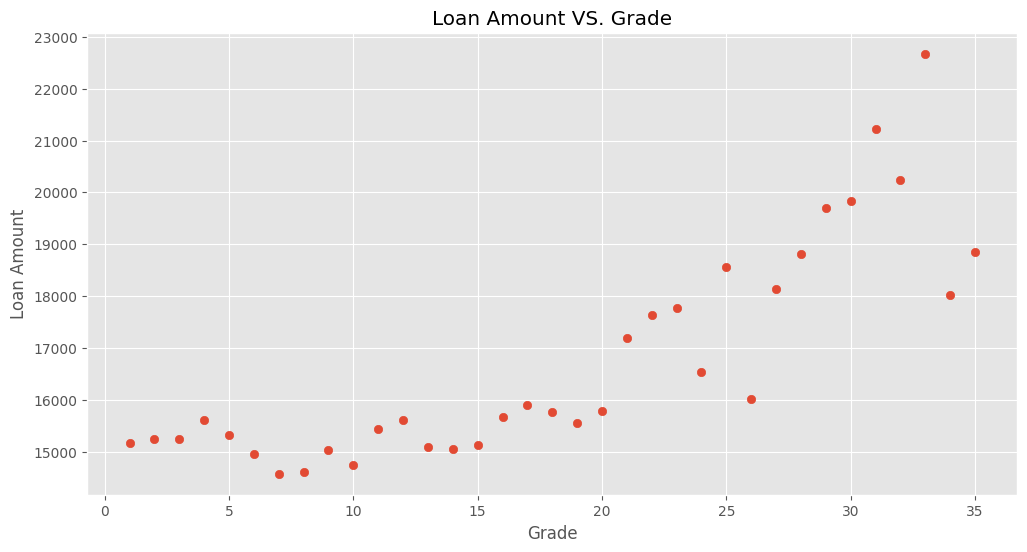

In [25]:
plot_scatter_average(df, 'Grade','Loan Amount', (12, 6))

- Q11: Is the loan amount the same as the funded amount?

Answer: We can observe that the loan amount is almost the same as the funded amount. We can infer that the funded amount is the amount that the customer actually receives.

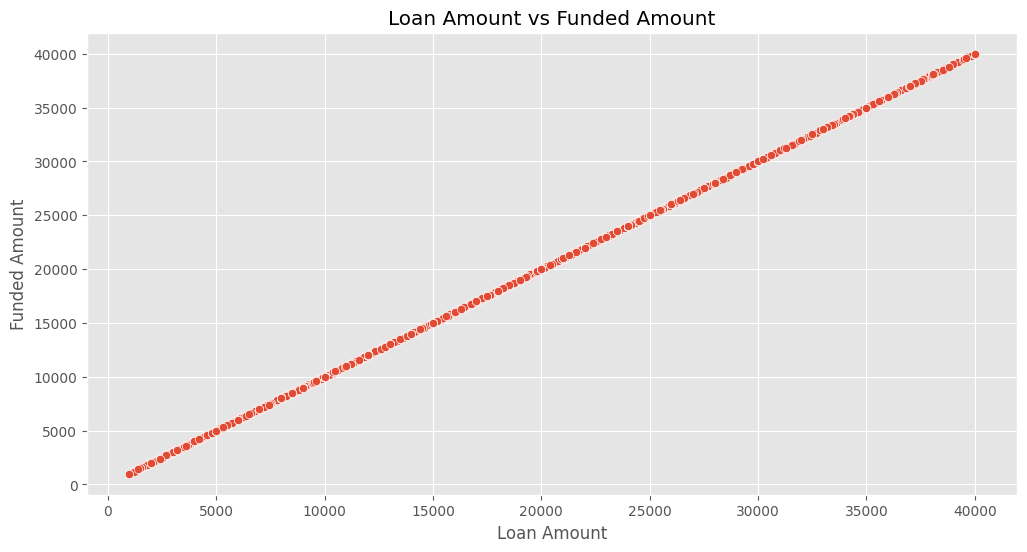

In [26]:
plot_scatterplot(df, 'Loan Amount', 'Funded Amount', figsize=(12, 6))

- Q12: Is there a relationship between the loan grade and the interest rate?

Answer: We can observe that higher grade such as (A, B, C) have lower interest rates compared to lower grades such as (D, E, F, G). This indicates that customers with higher grades are less risky and are charged lower interest rates.

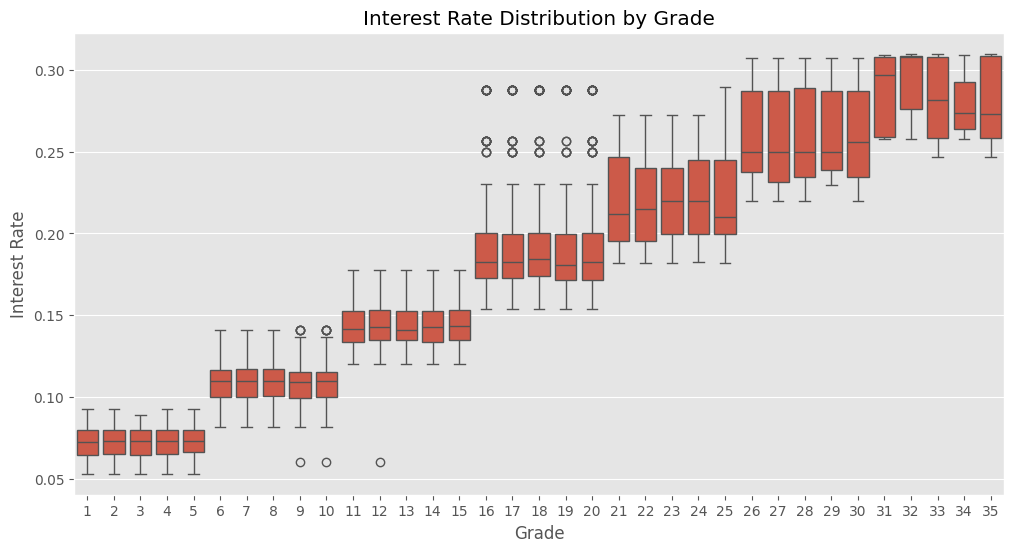

In [27]:
plot_boxplot_multiple_columns(df, 'Grade', 'Int Rate', 'Interest Rate Distribution by Grade', 'Grade', 'Interest Rate', (12, 6))

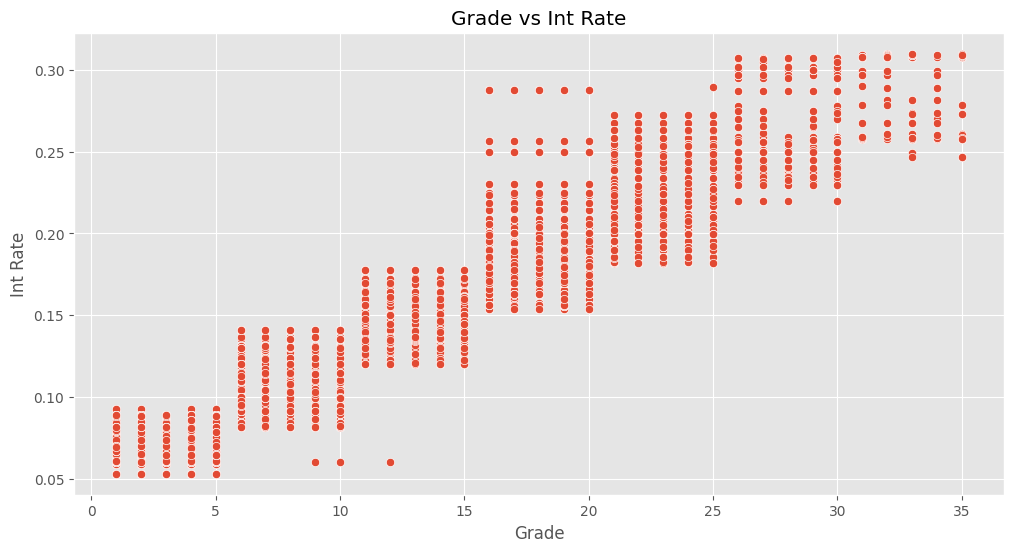

In [28]:
plot_scatterplot(df, 'Grade', 'Int Rate', (12, 6))

- Q13: What is the most common purpose for taking a loan?

Answer: We can observe that the most common purpose for taking a loan is debt consolidation, followed by credit card. This indicates that most customers take loans to consolidate their debts.

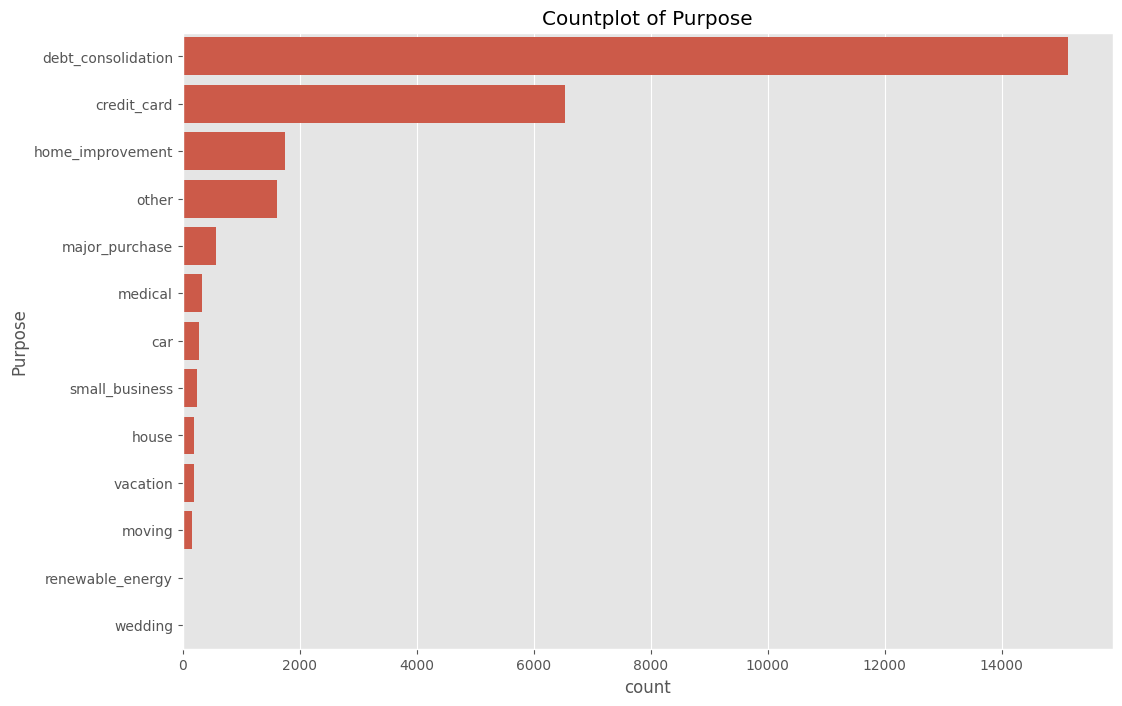

In [29]:
plot_horizontal_countplot(df, 'Purpose', (12, 8))

### Observations:

- The distribution of loan amount among customers is right-skewed, with most customers having a loan amount of around 10000. We can observe that most loans fall within a specific range indicating that customers tend to borrow moderate amounts.

- The top 10 employee titles that issue loans are Teacher, Manager, Owner, Registered Nurse, Driver, Supervisor, Sales, Project Manager, and Office Manager.

- Employees with 10 years of employment are the most common among customers.

- Loan amounts do not vary significantly by employment length, but there is a slight increase in loan amounts for customers with longer employment. Customers with very short employment lengths also have smaller loan amounts on average.

- There seems to be a positive trend between annual income and loan amount, higher-income individuals generally take larger loans, yet the correlation is not strictly linear, suggesting that other factors may also influence loan amount.

- There is a high percentage of customers whose income and employment are not verified. This could be a potential risk that these customers may not be able to repay the loan.

- The top 5 states with the highest number of borrowers are California, Texas, New York, Florida, and Illinois.

- Most loans are current, followed by fully paid. This indicates that most customers are able to repay their loans(i.e most of the loans are either actively being repaid or have been fully repaid)

- Most loans are grade B, followed by grade C. Most of the loans are current, followed by fully paid.

- Classes E,F,G have higher loan amounts compared to other classes. This indicates that customers with lower loan grades tend to borrow more money.

- The loan amount is almost the same as the funded amount. We can infer that the funded amount is the amount that the customer actually receives.

- Higher grade such as (A, B, C) have lower interest rates compared to lower grades such as (D, E, F, G). This indicates that customers with higher grades are less risky and are charged lower interest rates. 

- The most common purpose for taking a loan is debt consolidation, followed by credit card. This indicates that most customers take loans to consolidate their debts.

# 3 - Cleaning Data

In [31]:
df.columns

Index(['Customer Id', 'Emp Title', 'Emp Length', 'Home Ownership',
       'Annual Inc', 'Annual Inc Joint', 'Verification Status', 'Zip Code',
       'Addr State', 'Avg Cur Bal', 'Tot Cur Bal', 'Loan Id', 'Loan Status',
       'Loan Amount', 'State', 'Funded Amount', 'Term', 'Int Rate', 'Grade',
       'Issue Date', 'Pymnt Plan', 'Type', 'Purpose', 'Description'],
      dtype='object')

## Tidying up column names

I have renamed the columns to make them more readable and consistent, by converting them to lowercase and replacing spaces with underscores and removing special characters.

In [32]:
def clean_column_name(column_name: str):
    formatted_name = column_name.lower()
    formatted_name = formatted_name.strip()
    formatted_name = formatted_name.replace(' ', '_')
    formatted_name = ''.join(e for e in formatted_name if e.isalnum() or e == '_')

    return formatted_name

def clean_column_names(df: pd.DataFrame):
    df.columns = [clean_column_name(column) for column in df.columns]
    return df

df = clean_column_names(df)

In [33]:
df.columns

Index(['customer_id', 'emp_title', 'emp_length', 'home_ownership',
       'annual_inc', 'annual_inc_joint', 'verification_status', 'zip_code',
       'addr_state', 'avg_cur_bal', 'tot_cur_bal', 'loan_id', 'loan_status',
       'loan_amount', 'state', 'funded_amount', 'term', 'int_rate', 'grade',
       'issue_date', 'pymnt_plan', 'type', 'purpose', 'description'],
      dtype='object')

## Choose a suitable column index

I have created a function that returns the candidate columns for the index based on the uniqueness of the values of the columns. I have selected the column 'loan_id' as the index since it is unique and can be used to identify each row.

In [34]:
def index_feature_candidates(df: pd.DataFrame):
    return df.shape[0] - df.nunique()

index_feature_candidates(df)

customer_id                0
emp_title              13898
emp_length             27019
home_ownership         27026
annual_inc             23942
annual_inc_joint       26372
verification_status    27027
zip_code               26177
addr_state             26980
avg_cur_bal            10032
tot_cur_bal             1527
loan_id                    0
loan_status            27023
loan_amount            25842
state                  26980
funded_amount          25842
term                   27028
int_rate               26665
grade                  26995
issue_date             26941
pymnt_plan             27028
type                   27025
purpose                27017
description            26228
dtype: int64

We can see that we have two features that can be used as index so I will use the loan_id as it is more readable than customer id

In [35]:
df.set_index('loan_id')

,customer_id,emp_title,emp_length,home_ownership,annual_inc,annual_inc_joint,verification_status,zip_code,addr_state,avg_cur_bal,tot_cur_bal,loan_status,loan_amount,state,funded_amount,term,int_rate,grade,issue_date,pymnt_plan,type,purpose,description
loan_id,,,,,,,,,,,,,,,,,,,,,,,
197838,YidceGZkXHgxZmtceGY1XHhiOFx4MDN3XHg4MnxceGUxXH...,Lieutenant,10+ years,MORTGAGE,200000.0,NaN,Source Verified,117xx,NY,19404.0,329872.0,Current,20000.0,NY,20000.0,60 months,0.1240,6,19 August 2019,False,Individual,debt_consolidation,Debt consolidation
124597,YidUXHhhZlx4YTVcdFx4ZmYhRWpbXHhmMDRceDE4WE03XH...,Senior Film Management,10+ years,MORTGAGE,63000.0,NaN,Verified,441xx,OH,1946.0,38927.0,Current,12000.0,OH,12000.0,60 months,0.0993,7,17 November 2017,False,Individual,credit_card,Credit card refinancing
107933,YidceGY5KUBceGVkXHhiOW9ceGI2ZVx4ZmVceGYze1x4YW...,Machinist 2,1 year,OWN,30000.0,NaN,Verified,972xx,OR,22762.0,136571.0,Charged Off,10750.0,OR,10750.0,36 months,0.1952,23,15 March 2015,False,Individual,debt_consolidation,Debt consolidation
63136,Yid3XHgwMVxyQVx4MTQxXHg5OFx4YjVceGMxPVx4OGZceD...,customer service,10+ years,RENT,20000.0,NaN,Verified,486xx,MI,1610.0,9662.0,Charged Off,8000.0,MI,8000.0,36 months,0.0789,2,15 March 2015,False,Individual,credit_card,Credit card refinancing
20511,YidceGFhXHgxMn5cblx4OGJceDkwXHhjN1x4YjRMR1x4Yz...,Drivet,2 years,RENT,48000.0,NaN,Source Verified,334xx,FL,5341.0,48069.0,Current,4200.0,FL,4200.0,36 months,0.0993,8,17 December 2017,False,Individual,debt_consolidation,Debt consolidation
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200561,YidceGYxXHhkMTAkXHhlNnNceDE0ZVx4ZTBceGI3XHJceG...,HHA,10+ years,RENT,45000.0,170000.0,Not Verified,100xx,NY,3057.0,36682.0,Current,20000.0,NY,20000.0,60 months,0.1709,16,18 February 2018,False,Joint App,debt_consolidation,Debt consolidation
13029,YidceDgwW1x4MDJceGM4TipceGRkXHgwZWBiNlx4OTZceD...,Letter Carrier,10+ years,MORTGAGE,91500.0,NaN,Source Verified,331xx,FL,18327.0,256580.0,Current,3200.0,FL,3200.0,36 months,0.1349,12,16 October 2016,False,INDIVIDUAL,home_improvement,Home improvement
147842,YidceGJlXHhmYlx4YTJccldceDAzSFx4OTJceGEwXHhmNF...,Chief building engineer,1 year,OWN,95000.0,NaN,Source Verified,088xx,NJ,3070.0,30702.0,Current,15000.0,NJ,15000.0,36 months,0.0799,1,17 January 2017,False,Individual,debt_consolidation,Debt consolidation


## Observe inconsistent data

Check if there is any duplicates rows in the dataset

In [36]:
def summarize_column_values(df: pd.DataFrame, columns: list):
    """
    Summarizes the values of specified columns in a DataFrame.

    Args:
    df (pd.DataFrame): The DataFrame to summarize.
    columns (list): List of column names to summarize.

    Returns:
    pd.DataFrame: A summary DataFrame containing unique values and their counts for each specified column.
    """
    summary_list = []

    for column in columns:
        if column in df.columns:
            value_counts = df[column].value_counts(dropna=False)
            # Create a summary entry for this column
            summary_entry = {
                'Column': column,
                'Total Values': df[column].size,
                'Unique Values': value_counts.size,
                'Value Counts': value_counts.to_dict()
            }
            summary_list.append(summary_entry)

    return summary_list

In [37]:
def check_duplicate_rows(df: pd.DataFrame):
    return df.duplicated().sum()

check_duplicate_rows(df)

0

Check if there exists any duplicate rows without considering the loan_id and customer_id as both uniquely identify each row

In [38]:
def check_duplicate_rows_without_unique_columns(df: pd.DataFrame, columns: list):
    # Drop the specified columns temporarily for duplicate checking
    df_temp = df.drop(columns=columns)
    # Find the duplicate rows based on the remaining columns
    duplicates = df[df_temp.duplicated(keep=False)]
    return duplicates

check_duplicate_rows_without_unique_columns(df, ['loan_id', 'customer_id']).head()

,customer_id,emp_title,emp_length,home_ownership,annual_inc,annual_inc_joint,verification_status,zip_code,addr_state,avg_cur_bal,tot_cur_bal,loan_id,loan_status,loan_amount,state,funded_amount,term,int_rate,grade,issue_date,pymnt_plan,type,purpose,description


There are no duplicate rows in the dataset

In [39]:
df.dtypes

customer_id             object
emp_title               object
emp_length              object
home_ownership          object
annual_inc             float64
annual_inc_joint       float64
verification_status     object
zip_code                object
addr_state              object
avg_cur_bal            float64
tot_cur_bal            float64
loan_id                  int64
loan_status             object
loan_amount            float64
state                   object
funded_amount          float64
term                    object
int_rate               float64
grade                    int64
issue_date              object
pymnt_plan                bool
type                    object
purpose                 object
description             object
dtype: object

In [40]:
ExpectedDataTypes = {
    "customer_id": "object",
    "emp_title": "object",
    "emp_length": "object",
    "home_ownership": "object",
    "annual_inc": "float64",
    "annual_inc_joint": "float64",
    "verification_status": "object",
    "zip_code": "object",
    "addr_state": "object",
    "avg_cur_bal": "float64",
    "tot_cur_bal": "float64",
    "loan_id": "int64",
    "loan_status": "object",
    "loan_amount": "float64",
    "state": "object",
    "funded_amount": "float64",
    "term": "object", 
    "int_rate": "float64",
    "grade": "int64",
    "issue_date": "object",
    "pymnt_plan": "bool",
    "type": "object",
    "purpose": "object",
    "description": "object"
}

def check_column_data_types(df: pd.DataFrame, expected_data_types=ExpectedDataTypes):
    for column in df.columns:
        actual_type = df[column].dtype
        expected_type = expected_data_types.get(column)
        if expected_type is None:
            print(f'Failure: No expected data type for column {column}')
        elif actual_type != expected_type:
            print(f'Failure :Column {column} has data type {actual_type} but expected {expected_type}')
        else:
            print(f'Column {column} has expected data type {expected_type}')


check_column_data_types(df)

Column customer_id has expected data type object
Column emp_title has expected data type object
Column emp_length has expected data type object
Column home_ownership has expected data type object
Column annual_inc has expected data type float64
Column annual_inc_joint has expected data type float64
Column verification_status has expected data type object
Column zip_code has expected data type object
Column addr_state has expected data type object
Column avg_cur_bal has expected data type float64
Column tot_cur_bal has expected data type float64
Column loan_id has expected data type int64
Column loan_status has expected data type object
Column loan_amount has expected data type float64
Column state has expected data type object
Column funded_amount has expected data type float64
Column term has expected data type object
Column int_rate has expected data type float64
Column grade has expected data type int64
Column issue_date has expected data type object
Column pymnt_plan has expected d

Check for negative values in the dataset as columns that are numeric such as annual_inc, annual_inc_joint, avg_cur_bal, tot_cur_bal, loan_id, loan_amount, funded_amount, int_rate, and grade should not have negative values.

In [41]:
def check_negative_numbers_in_numeric_columns(df: pd.DataFrame):
    for column in df.columns:
        if df[column].dtype in ['int64', 'float64']:
            if df[column].lt(0).sum() > 0:
                print(f'Column {column} has {df[column].lt(0).sum()} negative values.')

check_negative_numbers_in_numeric_columns(df)

There are no negative values in the dataset

Check if the columns of type object hold any numeric values

In [42]:
def check_numeric_in_object_columns(df: pd.DataFrame):
    res = []
    for column in df.columns:
        if df[column].dtype == 'object':
            if df[column].str.isnumeric().sum() > 0:
                print(f'Column {column} has {df[column].str.isnumeric().sum()} numeric values.')
                print(column)
                res += [column]

    return res

check_numeric_in_object_columns(df)

Column emp_title has 1 numeric values.
emp_title


['emp_title']

In [43]:
"Ask shown below, the emp_length column has numeric values"
test = df.dropna(subset=['emp_title'])
test[test['emp_title'].str.isnumeric()]

,customer_id,emp_title,emp_length,home_ownership,annual_inc,annual_inc_joint,verification_status,zip_code,addr_state,avg_cur_bal,tot_cur_bal,loan_id,loan_status,loan_amount,state,funded_amount,term,int_rate,grade,issue_date,pymnt_plan,type,purpose,description
25465,YidceGVlXHgwNVx4ZGNceGJiXHhhMENceDljXHgxOVx4YT...,10,< 1 year,RENT,65000.0,NaN,Source Verified,752xx,TX,4732.0,37853.0,45046,Current,6000.0,TX,6000.0,36 months,NaN,11,17 May 2017,False,Individual,home_improvement,Home improvement


Getting the value counts of the columns of type object to detect any irrelevant or incorrect data, different spelling with the same meaning

In [44]:
def get_categorical_columns(df: pd.DataFrame):
    categorical_value_counts = {}

    for column in df.columns:
        if column in ['loan_id', 'customer_id']:
            continue
        if df[column].dtype == 'object' or df[column].dtype == 'bool':
            categorical_value_counts[column] = df[column].value_counts()
    
    return categorical_value_counts

In [45]:
pd.set_option('display.max_rows', None)

In [ ]:
columns_to_standardize = ['emp_title', 'home_ownership', 'verification_status','type']

summarize_column_values(df, columns_to_standardize)

function to make the values of each column consistent by converting them to lowercase and capitalizing the first letter of each word

In [47]:
def standardize_values_proper_case(df: pd.DataFrame, columns: list):
    for column in columns:
        # if value is null or nan skip
        df[column] = df[column].apply(lambda x: ' '.join([word.capitalize() for word in str(x).split()]) if pd.notnull(x) else x)
    
    return df

columns_to_standardize = ['emp_title', 'home_ownership', 'verification_status', 'type']

df = standardize_values_proper_case(df, columns_to_standardize)

In [ ]:
summarize_column_values(df, columns_to_standardize)

As we can all the columns have consistent values where each value is capitalized and the rest are lowercase 

In [49]:
df.home_ownership.value_counts()

Mortgage    13349
Rent        10517
Own          3127
Any            37
Name: home_ownership, dtype: int64

In [50]:
df.verification_status.value_counts()

Source Verified    10606
Not Verified        9741
Verified            6683
Name: verification_status, dtype: int64

Observe if we can merge both source verified and verified into one class

Observing the 3 classes among the grades of the customer

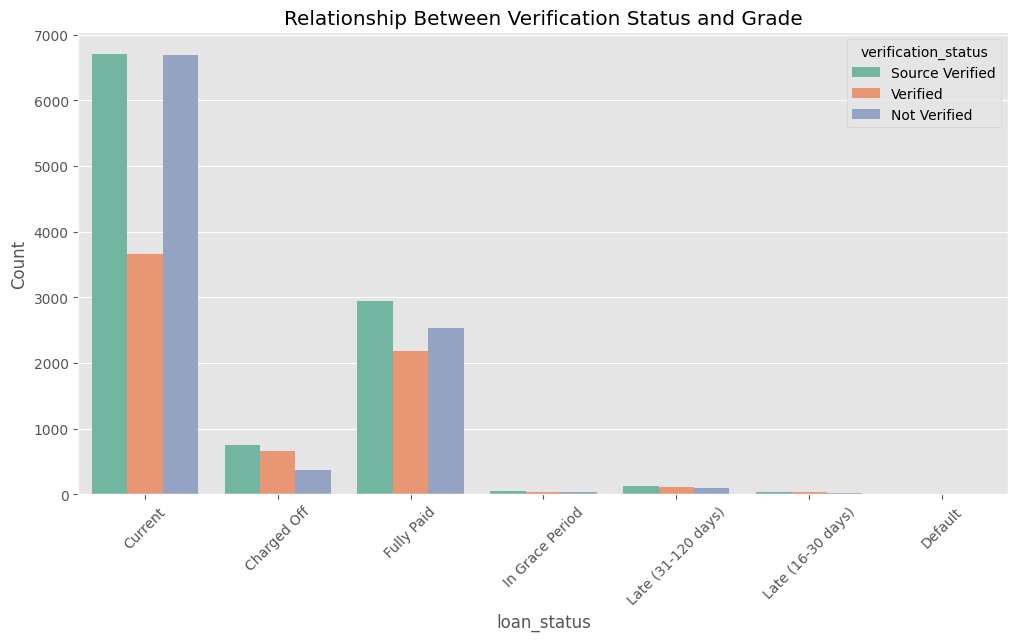

In [51]:
plot_countplot_multiple_columns(df, 'loan_status', 'verification_status', 'Relationship Between Verification Status and Grade', 'Grade', 'Count', (12, 6))

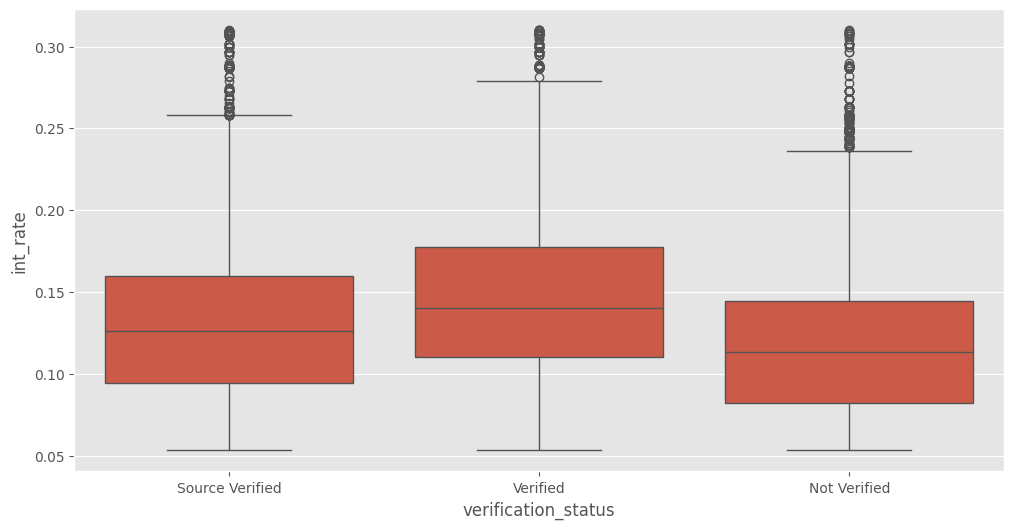

In [52]:
plot_boxplot_multiple_columns(df, 'verification_status', 'int_rate', '', 'verification_status', 'int_rate', (12, 6))

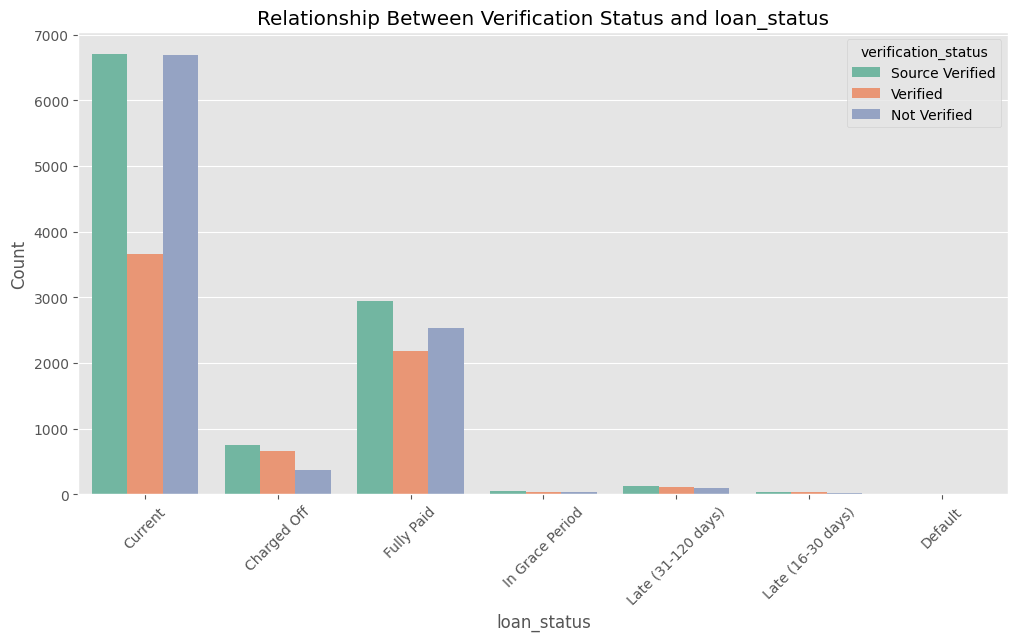

In [53]:
plot_countplot_multiple_columns(df, 'loan_status', 'verification_status', 'Relationship Between Verification Status and loan_status', 'loan_status', 'Count', (12, 6))

In [54]:
df.loan_status.value_counts()

Current               17036
Fully Paid             7650
Charged Off            1788
Late (31-120 days)      322
In Grace Period         136
Late (16-30 days)        97
Default                   1
Name: loan_status, dtype: int64

In [55]:
df.grade.value_counts().sort_index()

1     1135
2     1249
3     1158
4     1180
5     1142
6     1594
7     1605
8     1632
9     1508
10    1603
11    1523
12    1500
13    1517
14    1492
15    1516
16     760
17     784
18     821
19     763
20     764
21     274
22     250
23     254
24     258
25     240
26      77
27      89
28      69
29      79
30      65
31      23
32      33
33      32
34      18
35      23
Name: grade, dtype: int64

In [56]:
summarize_column_values(df, ['type'])

[{'Column': 'type',
  'Total Values': 27030,
  'Unique Values': 4,
  'Value Counts': {'Individual': 25091,
   'Joint App': 1827,
   'Joint': 93,
   'Direct_pay': 19}}]

As we can see in the column 'type' Joint App and Joint are the same so I will replace Joint App with Joint and Direct_pay with Direct Pay

In [57]:
def change_column_values_to_mapped_values(df: pd.DataFrame, column: str, mapping_dict: dict):
    df[column] = df[column].map(mapping_dict)
    return df

type_column_map = {
    "Individual": "Individual",
    "Joint": "Joint",
    "Joint App": "Joint",
    "Direct_pay": "Direct Pay"
}

df = change_column_values_to_mapped_values(df, 'type', type_column_map)

In [58]:
summarize_column_values(df, ['type'])

[{'Column': 'type',
  'Total Values': 27030,
  'Unique Values': 3,
  'Value Counts': {'Individual': 25091, 'Joint': 1920, 'Direct Pay': 19}}]

In [59]:
summarize_column_values(df, ['issue_date'])

[{'Column': 'issue_date',
  'Total Values': 27030,
  'Unique Values': 89,
  'Value Counts': {'16 March 2016': 644,
   '19 July 2019': 551,
   '19 October 2019': 477,
   '19 May 2019': 477,
   '15 October 2015': 476,
   '18 May 2018': 461,
   '18 April 2018': 460,
   '17 November 2017': 457,
   '19 September 2019': 457,
   '19 August 2019': 453,
   '19 April 2019': 453,
   '18 October 2018': 452,
   '18 August 2018': 441,
   '17 August 2017': 436,
   '15 December 2015': 434,
   '18 June 2018': 427,
   '18 July 2018': 425,
   '17 June 2017': 424,
   '18 December 2018': 421,
   '19 January 2019': 417,
   '16 February 2016': 416,
   '18 November 2018': 413,
   '15 July 2015': 412,
   '14 October 2014': 401,
   '19 December 2019': 399,
   '18 January 2018': 393,
   '17 May 2017': 391,
   '17 September 2017': 390,
   '18 March 2018': 386,
   '19 June 2019': 386,
   '19 November 2019': 384,
   '17 July 2017': 383,
   '18 September 2018': 381,
   '17 October 2017': 379,
   '17 December 2017': 

For the issue date, we need to check contain valid number of days in each month and year

In [60]:
def validate_date_values(df: pd.DataFrame, column: str):
    invalid_dates = []
    for idx, date in enumerate(df[column]):
        try:
            pd.to_datetime(date)
        except:
            invalid_dates.append((idx, date))
        
    return invalid_dates

validate_date_values(df, 'issue_date')

[]

In [61]:
df.nunique()

customer_id            27030
emp_title              10868
emp_length                11
home_ownership             4
annual_inc              3088
annual_inc_joint         658
verification_status        3
zip_code                 853
addr_state                50
avg_cur_bal            16998
tot_cur_bal            25503
loan_id                27030
loan_status                7
loan_amount             1188
state                     50
funded_amount           1188
term                       2
int_rate                 365
grade                     35
issue_date                89
pymnt_plan                 2
type                       3
purpose                   13
description              802
dtype: int64

As we can see all values of the issue date are valid, what we did we looped over the values of the issue date and tried to cast to datetime if it fails we will append the location of the value to the invalid_dates list

## Findings and conclusions

## Observing Missing Data

In [ ]:
def get_null_count_and_percentage(df: pd.DataFrame, percentage=False):
    """
    Returns the count or percentage of missing values for each column with null entries.

    Args:
    df (pd.DataFrame): The DataFrame to analyze.
    percentage (bool): If True, returns the percentage of null values per column. Defaults to False.

    Returns:
    pd.Series: A Series showing either the count or percentage of missing values for columns with null values.
    """
    null_cnt = df.isnull().sum()

    null_cnt = null_cnt[null_cnt > 0]
    if percentage:
        null_cnt = null_cnt / len(df) * 100
    return null_cnt

get_null_count_and_percentage(df), get_null_count_and_percentage(df, percentage=True)    

In [ ]:
def check_for_non_standard_missing_values(df: pd.DataFrame, columns: list):
    """
    Checks for non-standard missing values in the specified columns of a dataframe.

    Args:
    df (pd.DataFrame): The dataframe to check for non-standard missing values.
    columns (list): List of column names to check for non-standard missing values.

    Returns:
    dict: A dictionary where each key is a column name, and each value is a dictionary containing:
          - 'values': A list of unique non-standard missing values found.
          - 'count': The count of occurrences for non-standard missing values in that column.
    """
    # Define the non-standard missing values to search for
    non_standard_missing_values = ["na", "n/a", "missing", "none", "nan", "null", "nil"]
    
    # Store found values and counts in a dictionary
    missing_values_dict = {}
    
    for column in columns:
        # Initialize sets for non-standard missing values and their counts
        found_values = set()
        count = 0
        
        # Check for each non-standard missing value in the column
        for value in non_standard_missing_values:
            # Filter for exact matches using case-insensitive comparison
            matches = df[df[column].astype(str).str.lower() == value]
            
            # Add unique matches to found_values and update the count
            found_values.update(matches[column].unique())
            count += len(matches)
        
        # Store the unique values and their count for this column
        if found_values:
            missing_values_dict[column] = {'values': list(found_values), 'count': count}
    
    return missing_values_dict

check_for_non_standard_missing_values(df, df.columns)


In [ ]:
get_null_count_and_percentage(df).sort_values(ascending=False)

We have 5 columns with missing data which are annual_inc_joint, emp_title, emp_length, int_rate, and description. We will handle the missing data in the next step.

In [67]:
def visualize_cols_values_cnt(df: pd.DataFrame, col_name: str, percentage=False, title=None):
    (df[col_name].value_counts(dropna=False) * ((100/len(df)) if percentage else 1) ).plot(kind='bar', xlabel=col_name, ylabel='count', title=title)


#### Let's start by investigating the missing data in the annual_inc_joint column

In [ ]:
# calculate the count of null values of annual_inc_joint in each loan type
df.groupby('type')['annual_inc_joint'].apply(lambda x: x.isnull().sum()) 

There are no missing values in the annual_inc_joint with the loan type being joint

In [ ]:
individual_count = df[df['type'] == 'Individual']['type'].count()
direct_pay_count =df[df['type'] == 'Direct Pay']['type'].count()

individual_count+direct_pay_count == df[df['annual_inc_joint'].isnull()]['type'].count()


In [ ]:
df['annual_inc_joint'].describe()

Let's talk about the loan types in the dataset. We have 3 types of loans which are:
#### 1. Individual Loan
**Definition:**  
An individual loan is taken out by a single borrower, who is solely responsible for repaying the loan.

---

#### 2. Joint Loan
**Definition:**  
A joint loan is applied for and signed by two or more borrowers, such as spouses or business partners. All individuals on the loan are responsible for repaying it.

---

#### 3. Direct Pay Loan
**Definition:**  
In a direct pay loan, the lender pays the funds directly to the institution or organization on behalf of the borrower, rather than disbursing the funds to the borrower.

---

#### We have observed that the annual_inc_joint column is missing for all individual and direct_pay loans. This is because these types of loans do not have a joint applicant.

### **Annual Inc Joint Column**: This data is missing not at random (MNAR) as the missing values are dependent on the loan type.

- We can fill the missing values in the annual_inc_joint column with 0 for individual and direct_pay loans.
- As 0 will act as special character indicating the loan_type is individual or direct_pay loan which does not have a joint applicant.


#### Let's investigate the missing data in the empl_title column

In [ ]:
df['emp_title'].isna().sum(), df['emp_title'].isna().mean()*100

- The number of missing values in the emp_title column is 2376.
- The percentage of missing values in the emp_title column is 8.8%.

In [ ]:
df[df['emp_title'].isna()].head(10)

In [ ]:
df[df['emp_title'].isna()].tail(10)

In [ ]:
df['emp_title'].isna().groupby(df['emp_length']).sum()

#### Let's investigate the missing data in the int_rate column

In [ ]:
df['int_rate'].isna().sum(), df['int_rate'].isna().mean()*100

- The number of missing values in the int_rate column is 1211.
- The percentage of missing values in the int_rate column is 4.48%.

In [ ]:
df[df['int_rate'].isna()].head()

## Handling Missing data

## Findings and conclusions

## Observing outliers

## Handling outliers

## Findings and conclusions

# 4 - Data transformation and feature eng.

## 4.1 - Adding Columns

## 4.2 - Encoding

## 4.22 - Findings and conlcusions

## 4.3 - Normalization 

## 4.31 - Findings and conclusions

# 5 - Lookup Table(s)

# 6 - Bonus ( Data Integration )

## 5- Exporting the dataframe to a csv file or parquet